# 배치정규화



In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
iris = load_iris()

In [14]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df= df.astype(float)

In [17]:
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [18]:
# 원핫 인코딩
label = pd.get_dummies(df['label'], prefix = 'label')
df = pd.concat([df, label], axis = 1)
df.drop(['label'], axis = 1, inplace=True)

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [22]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# 배열로 변환후 저장
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
# 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
# 배치 정규화가 적용되지 않은 모델
model1 = Sequential([
                     Dense(64, input_shape = (4, ), activation = 'relu'),
                     Dense(128, activation = 'relu'),
                     Dense(128, activation = 'relu'),
                     Dense(64, activation = 'relu'),
                     Dense(3, activation = 'softmax')
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 33,603
Trainable params: 33,603
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 컴파일
model1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

history1 = model1.fit(
    X_train,
    y_train,
    epochs = 1000,
    validation_split = 0.25,
    batch_size = 40,
    verbose = 2
)

Epoch 1/1000
3/3 - 1s - loss: 1.0313 - acc: 0.4444 - val_loss: 0.9060 - val_acc: 0.4333
Epoch 2/1000
3/3 - 0s - loss: 0.8501 - acc: 0.7222 - val_loss: 0.7620 - val_acc: 0.7667
Epoch 3/1000
3/3 - 0s - loss: 0.7309 - acc: 0.8444 - val_loss: 0.6998 - val_acc: 0.5000
Epoch 4/1000
3/3 - 0s - loss: 0.6368 - acc: 0.7111 - val_loss: 0.6712 - val_acc: 0.4333
Epoch 5/1000
3/3 - 0s - loss: 0.5637 - acc: 0.7111 - val_loss: 0.5726 - val_acc: 0.7333
Epoch 6/1000
3/3 - 0s - loss: 0.4994 - acc: 0.9111 - val_loss: 0.4699 - val_acc: 1.0000
Epoch 7/1000
3/3 - 0s - loss: 0.4411 - acc: 0.9778 - val_loss: 0.4327 - val_acc: 1.0000
Epoch 8/1000
3/3 - 0s - loss: 0.4010 - acc: 0.9667 - val_loss: 0.3676 - val_acc: 0.9667
Epoch 9/1000
3/3 - 0s - loss: 0.3629 - acc: 0.9556 - val_loss: 0.3529 - val_acc: 1.0000
Epoch 10/1000
3/3 - 0s - loss: 0.3238 - acc: 0.9667 - val_loss: 0.3255 - val_acc: 1.0000
Epoch 11/1000
3/3 - 0s - loss: 0.2844 - acc: 0.9889 - val_loss: 0.3043 - val_acc: 0.9667
Epoch 12/1000
3/3 - 0s - loss:

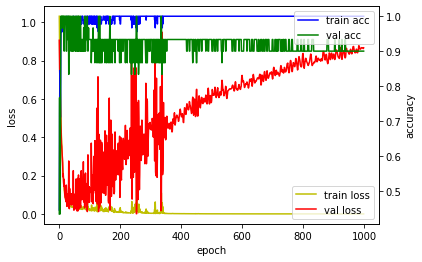

In [35]:
fig, loss_ax = plt.subplots()

# y축이 두 개 있는 플롯을 구성
acc_ax = loss_ax.twinx() 
loss_ax.plot(history1.history['loss'], 'y', label='train loss')
loss_ax.plot(history1.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history1.history['acc'], 'b', label='train acc')
acc_ax.plot(history1.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [36]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print('## 손실과 정확도 평가 ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 15ms/step - loss: 0.6367 - acc: 0.9333
## 손실과 정확도 평가 ##
[0.6366840600967407, 0.9333333373069763]


결과
- 검증 데이터 손실 값(val_loss)은 시간이 흐를 수록 감소 해야 하지만, 앞의 그래프는 시간이 흐를수록 증

- 반면 정확도는 100에 가까움, 훈련 손실값은 0에 가까운 값유지

- 즉, 훈련 데이터세셍 대한 정확도는 높으나 검증 데이터셋에 대한 정확도 는 낮음

- 학습이 진행될 때마다 은닉층에서는 이력 분포가 변화하면서 가중치가 엉뚱한 방향으로 갱신되는 문제가 종종 발생

- 신경망층이 깊어지면 엉뚱한 학습이 진행될 수있는데, 배치 정규화를 통해 고르게 맞추어 주면서 과적합을 해결


In [37]:
# 배치 정규화 적용 모델
from tensorflow.keras.initializers import RandomNormal, Constant

In [42]:
model2 = Sequential([
                     Dense(64, input_shape= (4, ), activation = 'relu'),
                     BatchNormalization(),

                     Dense(128, activation = 'relu'),
                     BatchNormalization(),
                     Dense(128, activation = 'relu'),
                     BatchNormalization(),

                     Dense(64, activation = 'relu'),
                     BatchNormalization(),
                     Dense(64, activation = 'relu'),
                     
                     BatchNormalization(
                         momentum = 0.95, # 
                         epsilon = 0.005, # 분산이 0으로 계산되는 것을 방지하기 위해 분산에 추가되는 작은 실수 값
                         beta_initializer = RandomNormal(mean = 0.0, stddev = 0.05), # 베타 가중치 초기값
                         gamma_initializer = Constant(value = 0.9) # 감마 가중치 초기값
                     ),

                     Dense(3, activation = 'softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [44]:
# 컴파일
model2.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)
history2 = model2.fit(
    X_train,
    y_train,
    epochs = 1000,
    validation_split =0.25,
    batch_size =40,
    verbose =2
)

Epoch 1/1000
3/3 - 2s - loss: 1.1011 - acc: 0.4667 - val_loss: 0.9526 - val_acc: 0.6000
Epoch 2/1000
3/3 - 0s - loss: 0.2684 - acc: 0.9778 - val_loss: 0.9110 - val_acc: 0.5667
Epoch 3/1000
3/3 - 0s - loss: 0.1858 - acc: 0.9778 - val_loss: 0.8956 - val_acc: 0.5667
Epoch 4/1000
3/3 - 0s - loss: 0.1009 - acc: 0.9889 - val_loss: 0.8955 - val_acc: 0.5667
Epoch 5/1000
3/3 - 0s - loss: 0.1053 - acc: 0.9889 - val_loss: 0.9101 - val_acc: 0.5667
Epoch 6/1000
3/3 - 0s - loss: 0.1003 - acc: 0.9778 - val_loss: 0.9240 - val_acc: 0.5667
Epoch 7/1000
3/3 - 0s - loss: 0.0639 - acc: 0.9889 - val_loss: 0.9339 - val_acc: 0.5667
Epoch 8/1000
3/3 - 0s - loss: 0.0445 - acc: 1.0000 - val_loss: 0.9530 - val_acc: 0.5667
Epoch 9/1000
3/3 - 0s - loss: 0.0391 - acc: 1.0000 - val_loss: 0.9830 - val_acc: 0.5667
Epoch 10/1000
3/3 - 0s - loss: 0.0545 - acc: 0.9778 - val_loss: 1.0066 - val_acc: 0.5667
Epoch 11/1000
3/3 - 0s - loss: 0.0315 - acc: 1.0000 - val_loss: 1.0218 - val_acc: 0.5667
Epoch 12/1000
3/3 - 0s - loss:

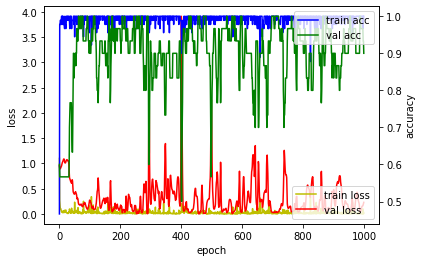

In [45]:
ig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['acc'], 'b', label='train acc')
acc_ax.plot(history2.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')

plt.show()

In [46]:
loss_and_metrics = model2.evaluate(X_test, y_test)
print('## 손실과 정확도 평가 ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 24ms/step - loss: 0.5366 - acc: 0.9000
## 손실과 정확도 평가 ##
[0.5366386771202087, 0.8999999761581421]


# 드롭아웃


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True
    )

# padded_batch :
# 배치에서 가장 긴 문자열의 길이를 기준으로 시퀀스를 0으로 채움
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[2680,  630,   14, ...,    0,    0,    0],
       [  19, 3634,   12, ...,    0,    0,    0],
       [  12,   31,   33, ...,    0,    0,    0],
       ...,
       [6346, 7961,    7, ...,    0,    0,    0],
       [1284,  554, 6136, ..., 5623, 1644, 7975],
       [2080,   75,   77, ...,    0,    0,    0]])

In [5]:
# 드롭아웃이 적용되지 않은 모델
encoder = info.features['text'].encoder
model = tf.keras.Sequential([

# 임베딩층
# 단어당 하나의 베터 저장, 임베딩이 호출되면 단어 인덱스 시퀀스를 벡터 시퀀스로 변환
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 272s 106ms/step - loss: 0.6931 - accuracy: 0.4994 - val_loss: 0.6925 - val_accuracy: 0.4933
Epoch 2/5
2500/2500 [==============================] - 255s 102ms/step - loss: 0.6888 - accuracy: 0.5161 - val_loss: 0.6881 - val_accuracy: 0.4967
Epoch 3/5
2500/2500 [==============================] - 250s 100ms/step - loss: 0.6590 - accuracy: 0.5914 - val_loss: 0.6443 - val_accuracy: 0.6700
Epoch 4/5
2500/2500 [==============================] - 248s 99ms/step - loss: 0.6091 - accuracy: 0.6914 - val_loss: 0.5907 - val_accuracy: 0.7600
Epoch 5/5
2500/2500 [==============================] - 252s 101ms/step - loss: 0.6752 - accuracy: 0.5282 - val_loss: 0.6828 - val_accuracy: 0.5000


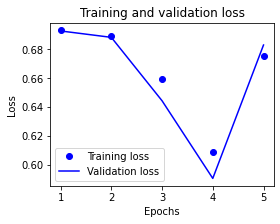

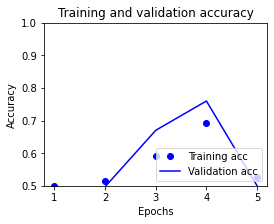

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history 
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1) 
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

결과

- 검증에 대한 손실이 네 번째 에포크에서 다시 높아짐
- 정상적이지 않음

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),

# 양방향 RNN 사용
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()